In [1]:
import piplite
await piplite.install('seaborn')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [3]:
#load the data

In [4]:
data = pd.read_csv('22 Categorical.csv')

In [5]:
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


In [6]:
data.describe(include='all')

,name,Longitude,Latitude,continent
count,241,241.000000,241.000000,241
unique,241,NaN,NaN,8
top,Aruba,NaN,NaN,Africa
freq,1,NaN,NaN,54
mean,NaN,14.215380,17.169377,NaN
std,NaN,72.013654,26.554014,NaN
min,NaN,-177.348348,-80.508579,NaN
25%,NaN,-36.433184,1.358761,NaN
50%,NaN,18.644925,17.277500,NaN
75%,NaN,47.587005,39.115541,NaN


In [7]:
data['continent'].unique()

array(['North America', 'Asia', 'Africa', 'Europe', 'South America',
       'Oceania', 'Antarctica', 'Seven seas (open ocean)'], dtype=object)

In [8]:
#Mapped the data

In [9]:
mapped_data = data.copy()

In [11]:
mapped_data['continent'] = mapped_data['continent'].map({'North America':0, 'Asia':1, 'Africa':2, 'Europe':3, 'South America':4, 'Oceania':5, 'Antarctica':6, 'Seven seas (open ocean)':7})

In [12]:
mapped_data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,2
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,3
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5
237,Yemen,47.586762,15.909280,1
238,South Africa,25.083901,-29.000341,2
239,Zambia,27.774759,-13.458242,2


In [13]:
#select features

In [14]:
x = mapped_data.iloc[:,3:4]

In [16]:
#Clustering

In [17]:
kmeans = KMeans(8)

In [18]:
kmeans.fit(x)

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.11 is maybe too old for this OS.
  warnings.warn(


KMeans()

In [19]:
#Clustering results

In [21]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([5, 1, 4, 5, 0, 0, 0, 1, 6, 1, 3, 7, 3, 2, 5, 3, 0, 1, 4, 0, 4, 4,
       1, 0, 1, 5, 5, 0, 5, 0, 5, 5, 6, 6, 5, 1, 1, 4, 4, 0, 6, 1, 4, 4,
       4, 4, 3, 6, 4, 4, 5, 5, 5, 5, 1, 1, 0, 0, 4, 5, 0, 5, 4, 6, 4, 4,
       0, 0, 4, 0, 3, 6, 0, 0, 3, 4, 0, 1, 0, 4, 4, 4, 4, 4, 0, 5, 5, 5,
       3, 6, 1, 2, 5, 0, 5, 0, 1, 0, 1, 1, 2, 0, 1, 1, 0, 1, 0, 5, 0, 1,
       1, 1, 1, 4, 1, 1, 3, 5, 1, 0, 1, 1, 1, 4, 4, 5, 0, 1, 4, 0, 0, 0,
       1, 5, 4, 0, 0, 4, 2, 5, 3, 0, 4, 0, 1, 0, 1, 3, 4, 4, 5, 2, 4, 1,
       4, 3, 4, 3, 4, 5, 3, 0, 0, 1, 3, 3, 1, 1, 5, 3, 6, 1, 3, 3, 0, 5,
       1, 0, 6, 1, 3, 1, 0, 0, 4, 4, 1, 4, 4, 4, 1, 2, 2, 3, 4, 5, 0, 4,
       4, 5, 0, 4, 6, 0, 0, 0, 4, 5, 2, 1, 5, 4, 4, 1, 1, 1, 1, 3, 5, 4,
       1, 1, 4, 4, 0, 6, 5, 1, 0, 5, 6, 5, 5, 1, 3, 3, 3, 1, 4, 4, 4])

In [22]:
data_with_clusters = mapped_data.copy()
data_with_clusters['Cluster'] = identified_clusters

In [23]:
data_with_clusters

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,0,5
1,Afghanistan,66.004734,33.835231,1,1
2,Angola,17.537368,-12.293361,2,4
3,Anguilla,-63.064989,18.223959,0,5
4,Albania,20.049834,41.142450,3,0
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5,3
237,Yemen,47.586762,15.909280,1,1
238,South Africa,25.083901,-29.000341,2,4
239,Zambia,27.774759,-13.458242,2,4


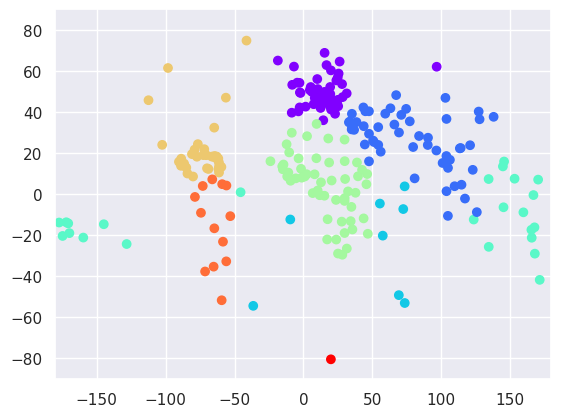

In [24]:
plt.scatter(data['Longitude'], data['Latitude'],c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()